In [0]:
import mxnet as mx
from mxnet import nd, autograd
import matplotlib.pyplot as plt

ctx = mx.gpu()

##Reading the data from text file

In [0]:
with open('text.txt') as file:
    text = file.read()

print(text)

Artificial intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using the information), reasoning (using rules to reach approximate or definite conclusions) and self-correction.
Particular applications of AI include expert systems, speech recognition and machine vision. Artificial intelligence (AI), the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings. The term is frequently applied to the project of developing systems endowed with the intellectual processes characteristic of humans, such as the ability to reason, discover meaning, generalize, or learn from past experience. Since the development of the digital computer in the 1940s, it has been demonstrated that computers can be programmed to carry out very complex tasks—as, for example, discovering proofs for mathematical theorems 

In [0]:
characters = list(set(text))
vocab_length = len(characters)
print(characters)
print(f'Number of unique characters: {vocab_length}')

['j', 'E', 'C', '’', 'L', 's', '.', 'u', 'l', 'H', 'P', '0', '(', 'v', 'S', 'T', 'F', 'N', '“', '9', 'D', 'm', 'q', 'I', 'x', 'z', 'o', '-', 'w', ':', ')', 'a', 'G', 'A', '\n', '?', 'V', 'n', '4', 'K', 'g', 't', 'W', 'h', ',', 'b', 'B', 'M', 'U', ' ', 'c', 'y', '”', 'k', '—', "'", 'O', '1', 'é', 'r', 'f', 'i', 'p', 'd', 'R', 'e', ';']
Number of unique characters: 67


In [0]:
char_to_int = dict([(char, i) for i, char in enumerate(characters)])
char_to_int

{'\n': 34,
 ' ': 49,
 "'": 55,
 '(': 12,
 ')': 30,
 ',': 44,
 '-': 27,
 '.': 6,
 '0': 11,
 '1': 57,
 '4': 38,
 '9': 19,
 ':': 29,
 ';': 66,
 '?': 35,
 'A': 33,
 'B': 46,
 'C': 2,
 'D': 20,
 'E': 1,
 'F': 16,
 'G': 32,
 'H': 9,
 'I': 23,
 'K': 39,
 'L': 4,
 'M': 47,
 'N': 17,
 'O': 56,
 'P': 10,
 'R': 64,
 'S': 14,
 'T': 15,
 'U': 48,
 'V': 36,
 'W': 42,
 'a': 31,
 'b': 45,
 'c': 50,
 'd': 63,
 'e': 65,
 'f': 60,
 'g': 40,
 'h': 43,
 'i': 61,
 'j': 0,
 'k': 53,
 'l': 8,
 'm': 21,
 'n': 37,
 'o': 26,
 'p': 62,
 'q': 22,
 'r': 59,
 's': 5,
 't': 41,
 'u': 7,
 'v': 13,
 'w': 28,
 'x': 24,
 'y': 51,
 'z': 25,
 'é': 58,
 '—': 54,
 '’': 3,
 '“': 18,
 '”': 52}

In [0]:
int_to_char = dict([(i, char) for i, char in enumerate(characters)])
int_to_char

{0: 'j',
 1: 'E',
 2: 'C',
 3: '’',
 4: 'L',
 5: 's',
 6: '.',
 7: 'u',
 8: 'l',
 9: 'H',
 10: 'P',
 11: '0',
 12: '(',
 13: 'v',
 14: 'S',
 15: 'T',
 16: 'F',
 17: 'N',
 18: '“',
 19: '9',
 20: 'D',
 21: 'm',
 22: 'q',
 23: 'I',
 24: 'x',
 25: 'z',
 26: 'o',
 27: '-',
 28: 'w',
 29: ':',
 30: ')',
 31: 'a',
 32: 'G',
 33: 'A',
 34: '\n',
 35: '?',
 36: 'V',
 37: 'n',
 38: '4',
 39: 'K',
 40: 'g',
 41: 't',
 42: 'W',
 43: 'h',
 44: ',',
 45: 'b',
 46: 'B',
 47: 'M',
 48: 'U',
 49: ' ',
 50: 'c',
 51: 'y',
 52: '”',
 53: 'k',
 54: '—',
 55: "'",
 56: 'O',
 57: '1',
 58: 'é',
 59: 'r',
 60: 'f',
 61: 'i',
 62: 'p',
 63: 'd',
 64: 'R',
 65: 'e',
 66: ';'}

In [0]:
int_text = [char_to_int[char] for char in text]
int_text

[33,
 59,
 41,
 61,
 60,
 61,
 50,
 61,
 31,
 8,
 49,
 61,
 37,
 41,
 65,
 8,
 8,
 61,
 40,
 65,
 37,
 50,
 65,
 49,
 12,
 33,
 23,
 30,
 49,
 61,
 5,
 49,
 41,
 43,
 65,
 49,
 5,
 61,
 21,
 7,
 8,
 31,
 41,
 61,
 26,
 37,
 49,
 26,
 60,
 49,
 43,
 7,
 21,
 31,
 37,
 49,
 61,
 37,
 41,
 65,
 8,
 8,
 61,
 40,
 65,
 37,
 50,
 65,
 49,
 62,
 59,
 26,
 50,
 65,
 5,
 5,
 65,
 5,
 49,
 45,
 51,
 49,
 21,
 31,
 50,
 43,
 61,
 37,
 65,
 5,
 44,
 49,
 65,
 5,
 62,
 65,
 50,
 61,
 31,
 8,
 8,
 51,
 49,
 50,
 26,
 21,
 62,
 7,
 41,
 65,
 59,
 49,
 5,
 51,
 5,
 41,
 65,
 21,
 5,
 6,
 49,
 15,
 43,
 65,
 5,
 65,
 49,
 62,
 59,
 26,
 50,
 65,
 5,
 5,
 65,
 5,
 49,
 61,
 37,
 50,
 8,
 7,
 63,
 65,
 49,
 8,
 65,
 31,
 59,
 37,
 61,
 37,
 40,
 49,
 12,
 41,
 43,
 65,
 49,
 31,
 50,
 22,
 7,
 61,
 5,
 61,
 41,
 61,
 26,
 37,
 49,
 26,
 60,
 49,
 61,
 37,
 60,
 26,
 59,
 21,
 31,
 41,
 61,
 26,
 37,
 49,
 31,
 37,
 63,
 49,
 59,
 7,
 8,
 65,
 5,
 49,
 60,
 26,
 59,
 49,
 7,
 5,
 61,
 37,
 40,
 49,
 41,
 

In [0]:
print(f'Total sequence length of the text: {len(int_text)}')
print(f'First 20 integers: {int_text[:20]}')
print(f'First 20 characters: {"".join([int_to_char[i] for i in int_text[:20]])}')

Total sequence length of the text: 9792
First 20 integers: [33, 59, 41, 61, 60, 61, 50, 61, 31, 8, 49, 61, 37, 41, 65, 8, 8, 61, 40, 65]
First 20 characters: Artificial intellige


In [0]:
def one_hot(ints, vocab_length = vocab_length):
    outputs = nd.zeros((len(ints), vocab_length))
    for i, idx in enumerate(ints):
        outputs[i, idx] = 1.0
    return outputs

In [0]:
print('Before one hot:')
print(int_text[:20])
print('After one hot:')
print(one_hot(int_text[:20]))

Before one hot:
[33, 59, 41, 61, 60, 61, 50, 61, 31, 8, 49, 61, 37, 41, 65, 8, 8, 61, 40, 65]
After one hot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
<NDArray 20x67 @cpu(0)>


In [0]:
def onehot_to_text(embeddings):
    outputs = ""
    ints = nd.argmax(embeddings, axis = 1).asnumpy()
    for i in ints:
        outputs += int_to_char[i]
    return outputs

In [0]:
onehot = one_hot(int_text[:20])
print('First 20 characters in Onehot:')
print(onehot)
print('\nAfter converting First 20 one hot embeddings to text:')
print(f'"{onehot_to_text(onehot)}"')

First 20 characters in Onehot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
<NDArray 20x67 @cpu(0)>

After converting First 20 one hot embeddings to text:
"Artificial intellige"


##Building the dataset

In [0]:
seq_length = 32
num_samples = (len(int_text) - 1)//seq_length
dataset = one_hot(int_text[: seq_length * num_samples]).reshape((num_samples, seq_length, vocab_length))
dataset.shape

(305, 32, 67)

In [0]:
output = onehot_to_text(dataset[0])
print(output)
print(f'Sequence length: {len(output)}')

Artificial intelligence (AI) is 
Sequence length: 32


In [0]:
batch_size = 8
batches = dataset.shape[0] // batch_size
print(f'Number of samples in dataset: {dataset.shape[0]}')
print(f'Number of batches: {batches}')

Number of samples in dataset: 305
Number of batches: 38


In [0]:
train_features = dataset[:batches * batch_size]
print(train_features.shape)
train_features = train_features.reshape((batch_size, batches, seq_length, vocab_length))
print(train_features.shape)
train_features = train_features.swapaxes(0, 1)
print(train_features.shape)
train_features = train_features.swapaxes(1, 2)
print(train_features.shape)

(304, 32, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [0]:
for i in range(5):
    print("Batch %s:\n %s \n %s \n\n" % (i, onehot_to_text(train_features[i, :, 0]), onehot_to_text(train_features[i, :, 1])))

Batch 0:
 Artificial intelligence (AI) is  
 ks requiring much everyday knowl 


Batch 1:
 the simulation of human intellig 
 edge. On the other hand, some pr 


Batch 2:
 ence processes by machines, espe 
 ograms have attained the perform 


Batch 3:
 cially computer systems. These p 
 ance levels of human experts and 


Batch 4:
 rocesses include learning (the a 
  professionals in performing cer 




In [0]:
train_labels = one_hot(int_text[1:seq_length*num_samples+1])
print(train_labels.shape)
train_labels = train_labels.reshape((batch_size, batches, seq_length, vocab_length))
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 0, 1)
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 1, 2)
print(train_labels.shape)

(9760, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [0]:
print(onehot_to_text(train_features[0, :, 4]))
print(onehot_to_text(train_labels[0, :, 4]))

mmon sense, reasoning and proble
mon sense, reasoning and problem


##Initializing parameters for our model

In [0]:
num_inputs = vocab_length
num_hidden = 512
num_outputs = vocab_length

Wxz = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
Wxr = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
Wxh = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001

Whz = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
Whr = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
Whh = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001

bz = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
br = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
bh = nd.random.normal(shape = num_hidden, ctx = ctx) * .001

Why = nd.random.normal(shape = (num_hidden,num_outputs), ctx = ctx) * .001
by = nd.random.normal(shape = num_outputs, ctx = ctx) * .001

params = [Wxz, Wxr, Wxh, Whz, Whr, Whh, bz, br, bh, Why, by]

for param in params:
    param.attach_grad()

In [0]:
def softmax(linear):
    exp = nd.exp((linear - nd.max(linear, axis = 1).reshape((-1, 1))))
    partition = nd.sum(exp, axis = 1).reshape((-1, 1))
    return exp / partition

In [0]:
def gru(inputs, h):
    outputs = []
    for X in inputs:
        z = nd.sigmoid(nd.dot(X, Wxz) + nd.dot(h, Whz) + bz)
        r = nd.sigmoid(nd.dot(X, Wxr) + nd.dot(h, Whr) + br)
        
        g = nd.tanh(nd.dot(X, Wxh) + nd.dot(r * h, Whh) + bh)
        h = z * h + (1 - z) * g

        linear = nd.dot(h, Why) + by
        output = softmax(linear)
        outputs.append(output)
    return (outputs, h)

In [0]:
def generate(prefix, num_chars):
    string = prefix

    int_prefix = [char_to_int[char] for char in prefix]
    input_sequence = one_hot(int_prefix).as_in_context(ctx)

    sample_state = nd.zeros(shape = (1, num_hidden), ctx = ctx)

    for i in range(num_chars):
        outputs, sample_state = gru(input_sequence, sample_state)
        choice = int(outputs[-1][0].argmax(0).asscalar())
        string += int_to_char[choice]
        input_sequence = one_hot([choice]).as_in_context(ctx)
    return string

In [0]:
print(generate("Artificial intelligence", 1024))

Artificial intelligenceOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [0]:
def cross_entropy(pred, label):
    return -nd.sum(label * nd.log(pred))

In [0]:
def objective(outputs, labels):
    total_loss = 0.
    for (output, label) in zip(outputs,labels):
        total_loss = total_loss + cross_entropy(output, label)
    return total_loss / len(outputs)

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [0]:
epochs = 100
learning_rate = .5
losses = []

for epoch in range(epochs):
    if (epoch + 1) % 40 == 0:
        learning_rate = learning_rate / 2.0
    state = nd.zeros(shape = (batch_size, num_hidden), ctx = ctx)
    for i in range(batches):
        features = train_features[i].as_in_context(ctx)
        labels = train_labels[i].as_in_context(ctx)
        with autograd.record():
            outputs, state = gru(features, state)
            loss = objective(outputs, labels)
            loss.backward()
        sgd(params, learning_rate)
    
    losses.append(loss.asscalar())
    print(f'\nEpoch: {epoch} | Loss: {loss.asscalar():.5f}')
    print(generate("Artificial intelligence", 1024))
    print('-'*50)
    print(generate("Research in AI has focused chiefly on", 1024))


Epoch: 0 | Loss: 24.43978
Artificial intelligence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

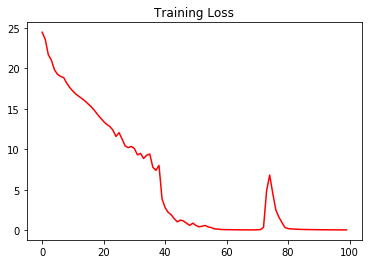

In [0]:
plt.plot(losses, c = 'r')
plt.title('Training Loss')
plt.show()

##Lets generate more paragraphs

In [0]:
print(generate("Machines can often act and react like", num_chars = 500))

Machines can often act and react like humans only if they have abundant information relating to the world. Artificial intelligence must have access to objects, categories, properties and relations between all of them to implement knowledge engineering. Initiating computer in the 1940s, it has been demonstrated that computers can be programmed to carry out very complex tasks—as, for example, discovering proofs for mathematical theorems or playing chess—with great proficiency.
Still, despite continuing advances in computer processing


In [0]:
print(generate("There are a number of different forms of learning", num_chars = 500))

There are a number of different forms of learning as applied to artificial intelligence. The simplest is learning by trial and error. For example, a simple computer program for solving mate-in-one chess problems might try moves at random until mate is found. The program might then store the solution with the position so that the next time the computer encountered the same position it would recall the solution. This simple memorizing of individual items and procedures—known as rote learning—is relatively easy to implement on a computer. More ch


In [0]:
print(generate("Problem solving, particularly in artificial intelligence, may be characterized as", num_chars = 250))

Problem solving, particularly in artificial intelligence, may be characterized as a systematic search through a range of possible actions in order to reach some predefined goal or solution. Problem-solving methods divide into special purpose and general purpose. A special-purpose method is tailor-made for a particular problem and
